In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [5]:
print('Blood Pressue : ', data.BP.unique())
print('Cholesterol   : ', data.Cholesterol.unique())
print('Drugs         : ', data.Drug.unique())

Blood Pressue :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol   :  ['HIGH' 'NORMAL']
Drugs         :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

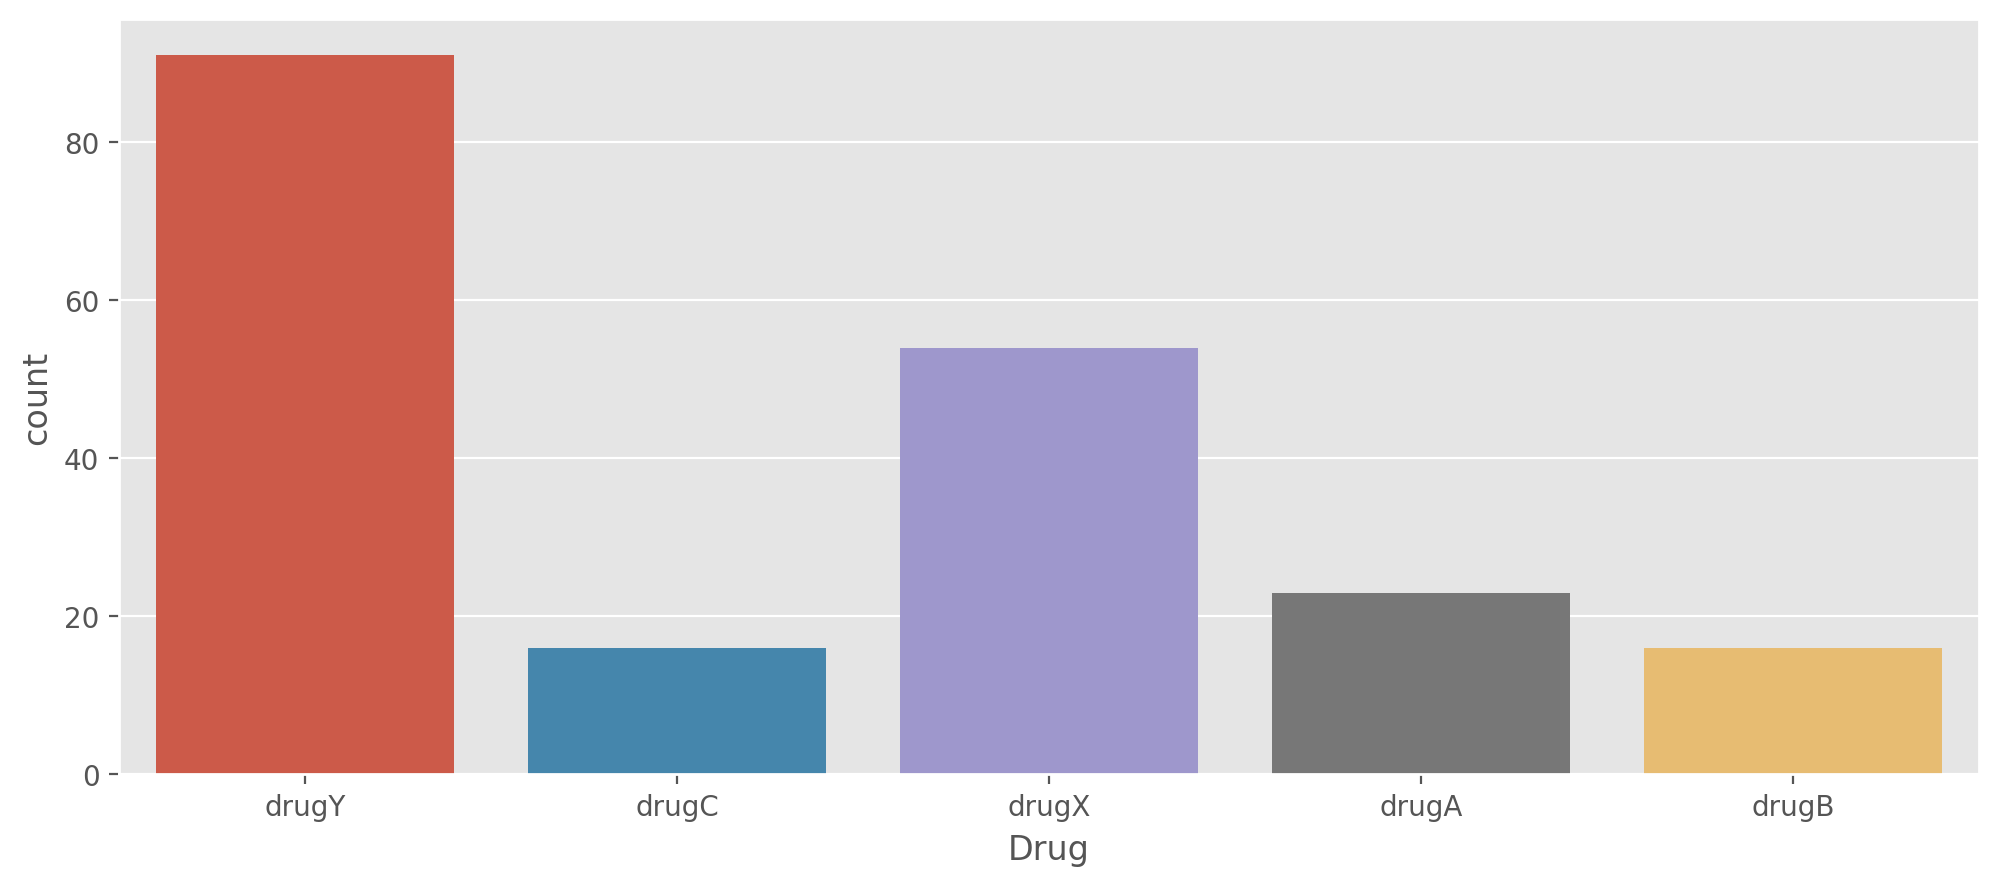

In [8]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug)

<AxesSubplot:ylabel='Age'>

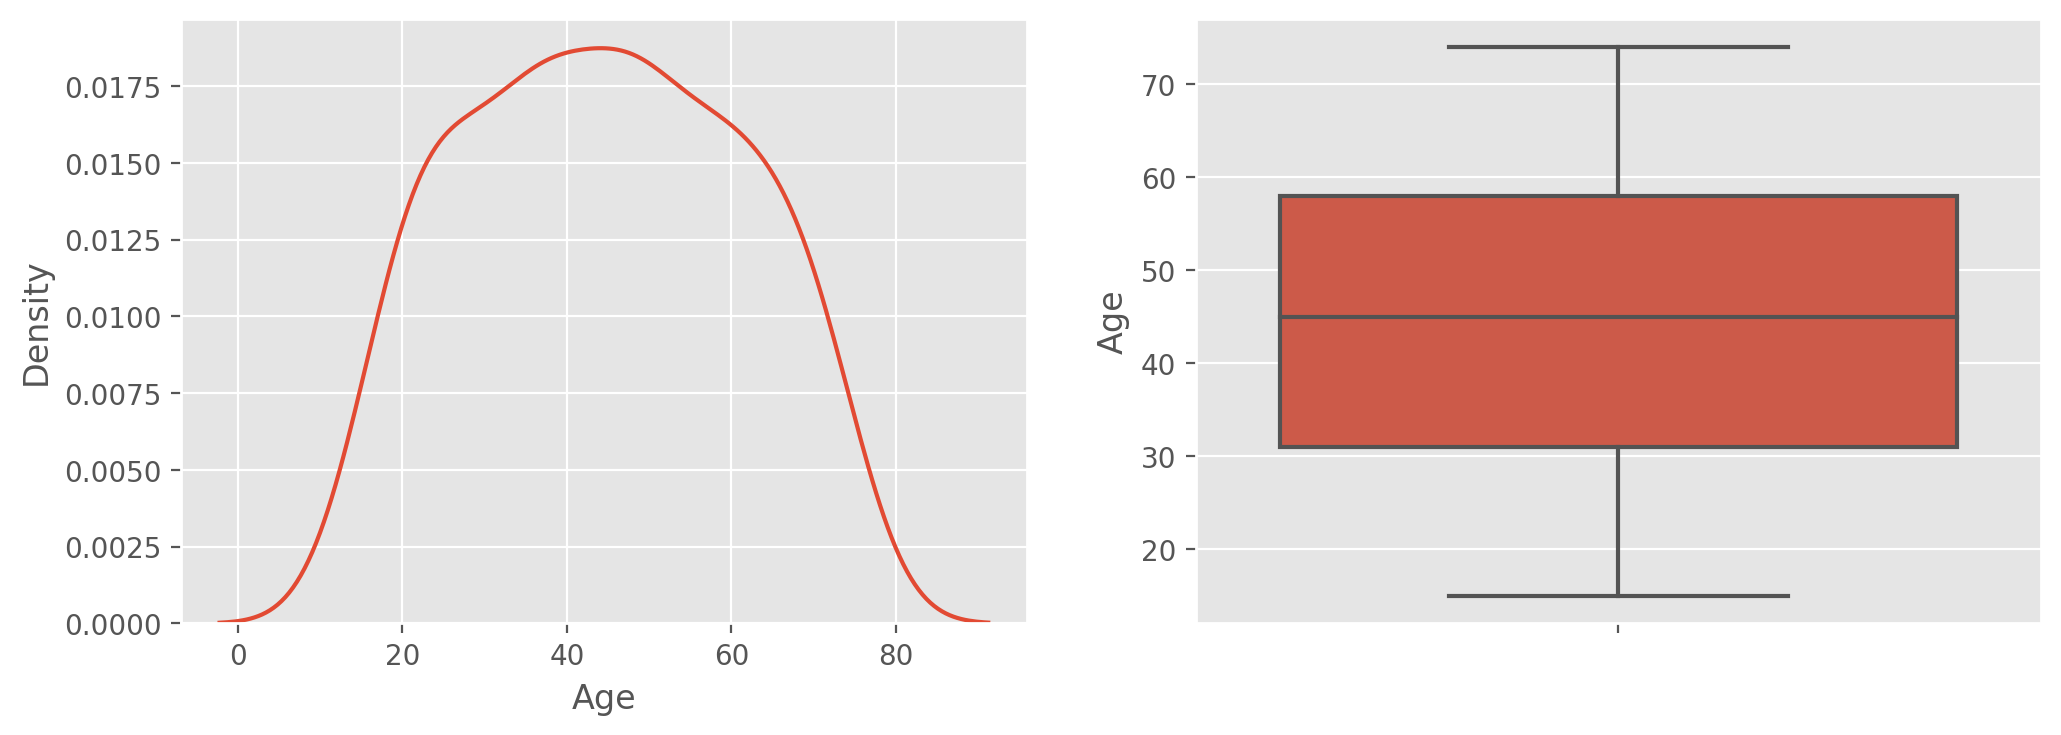

In [9]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data.Age, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data.Age)

<AxesSubplot:ylabel='Na_to_K'>

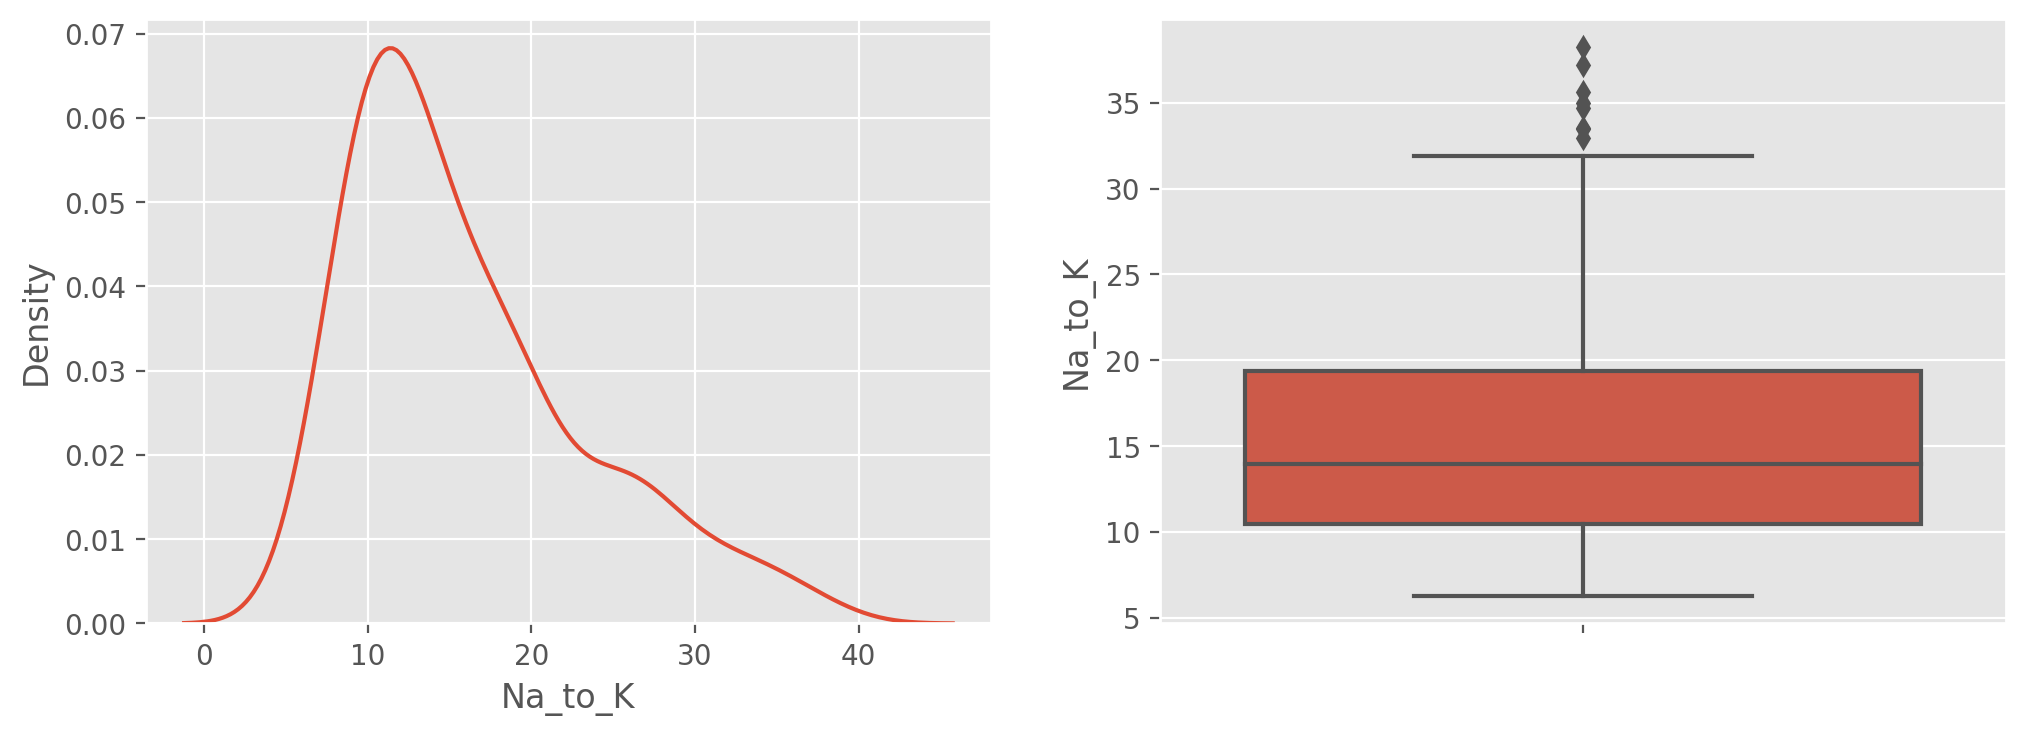

In [10]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data.Na_to_K, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data.Na_to_K)

<AxesSubplot:xlabel='Drug', ylabel='count'>

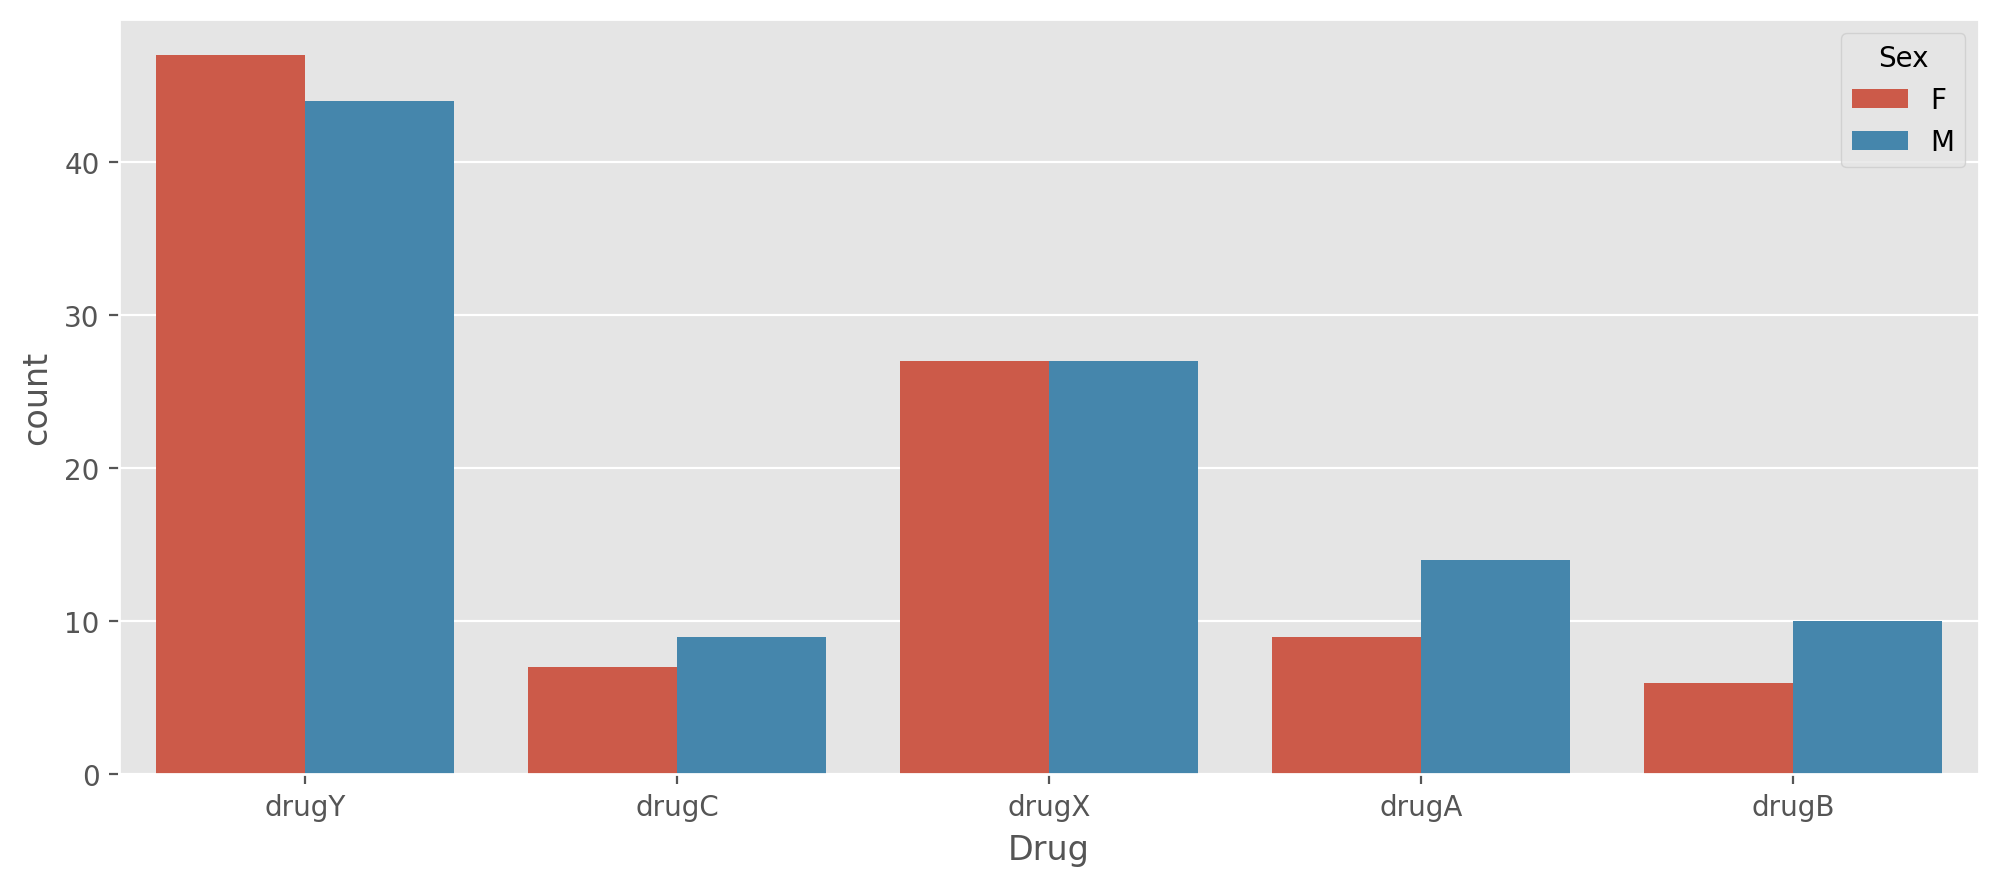

In [11]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug, hue = data.Sex)

<AxesSubplot:xlabel='Drug', ylabel='count'>

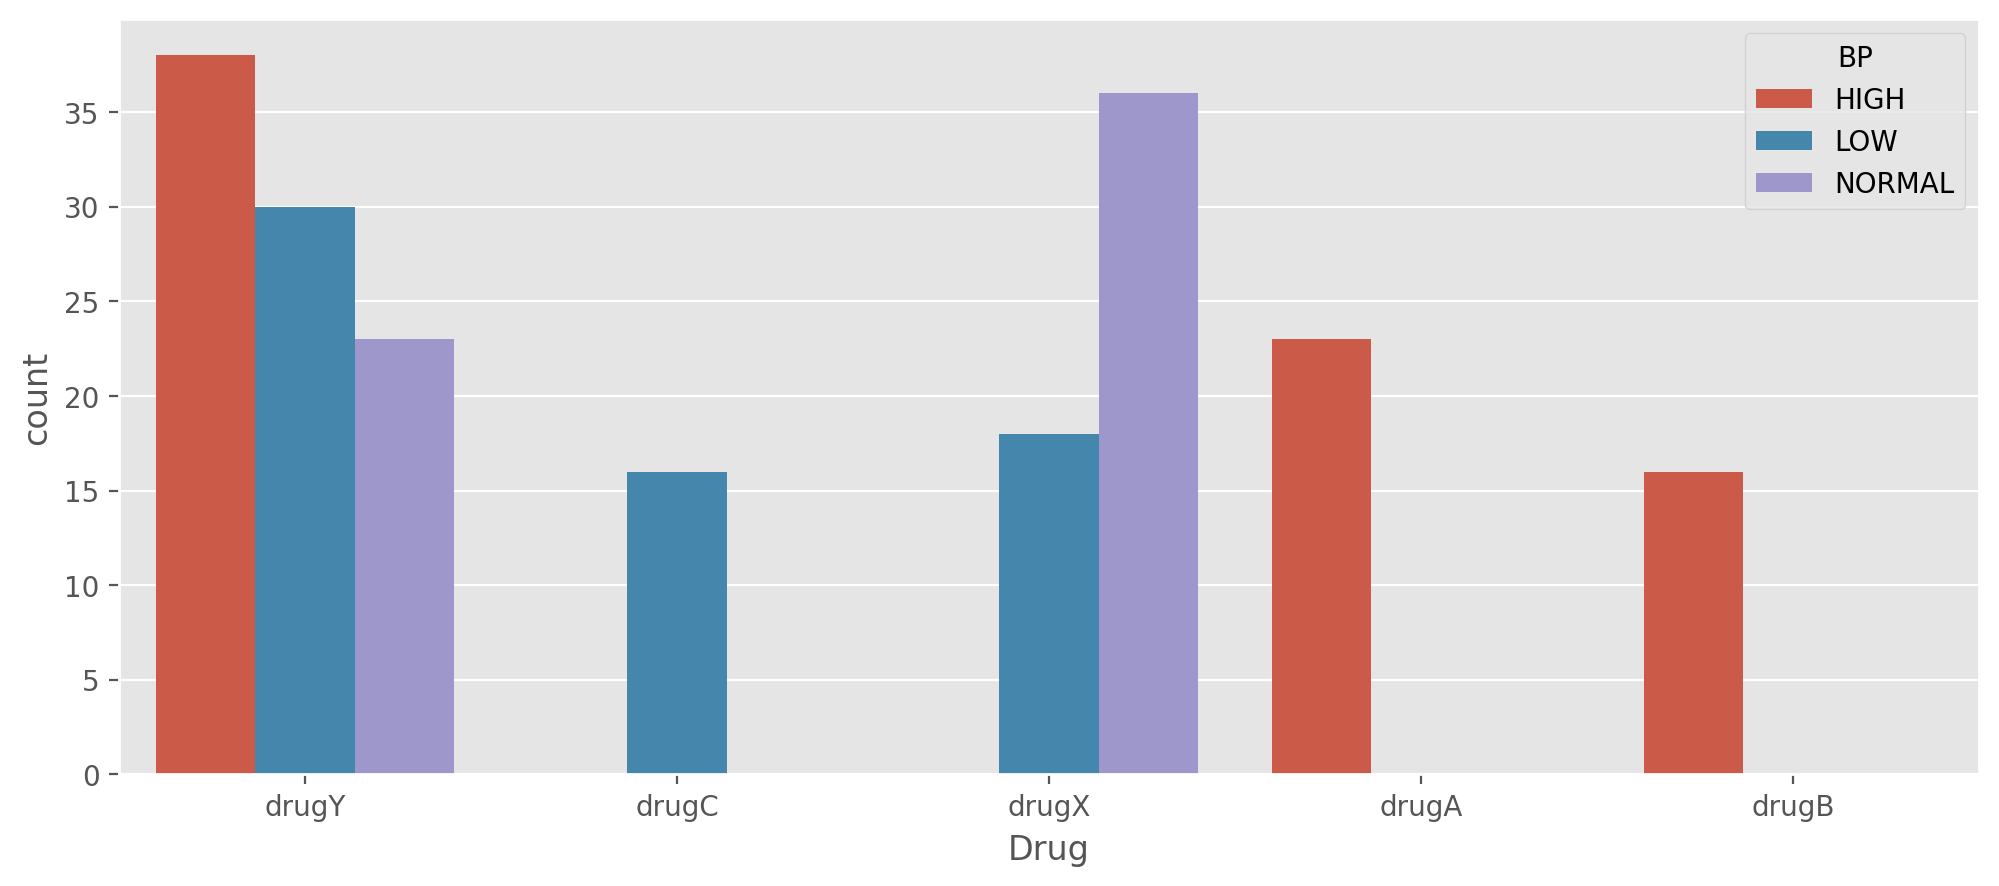

In [12]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug, hue = data.BP)

<AxesSubplot:xlabel='BP', ylabel='count'>

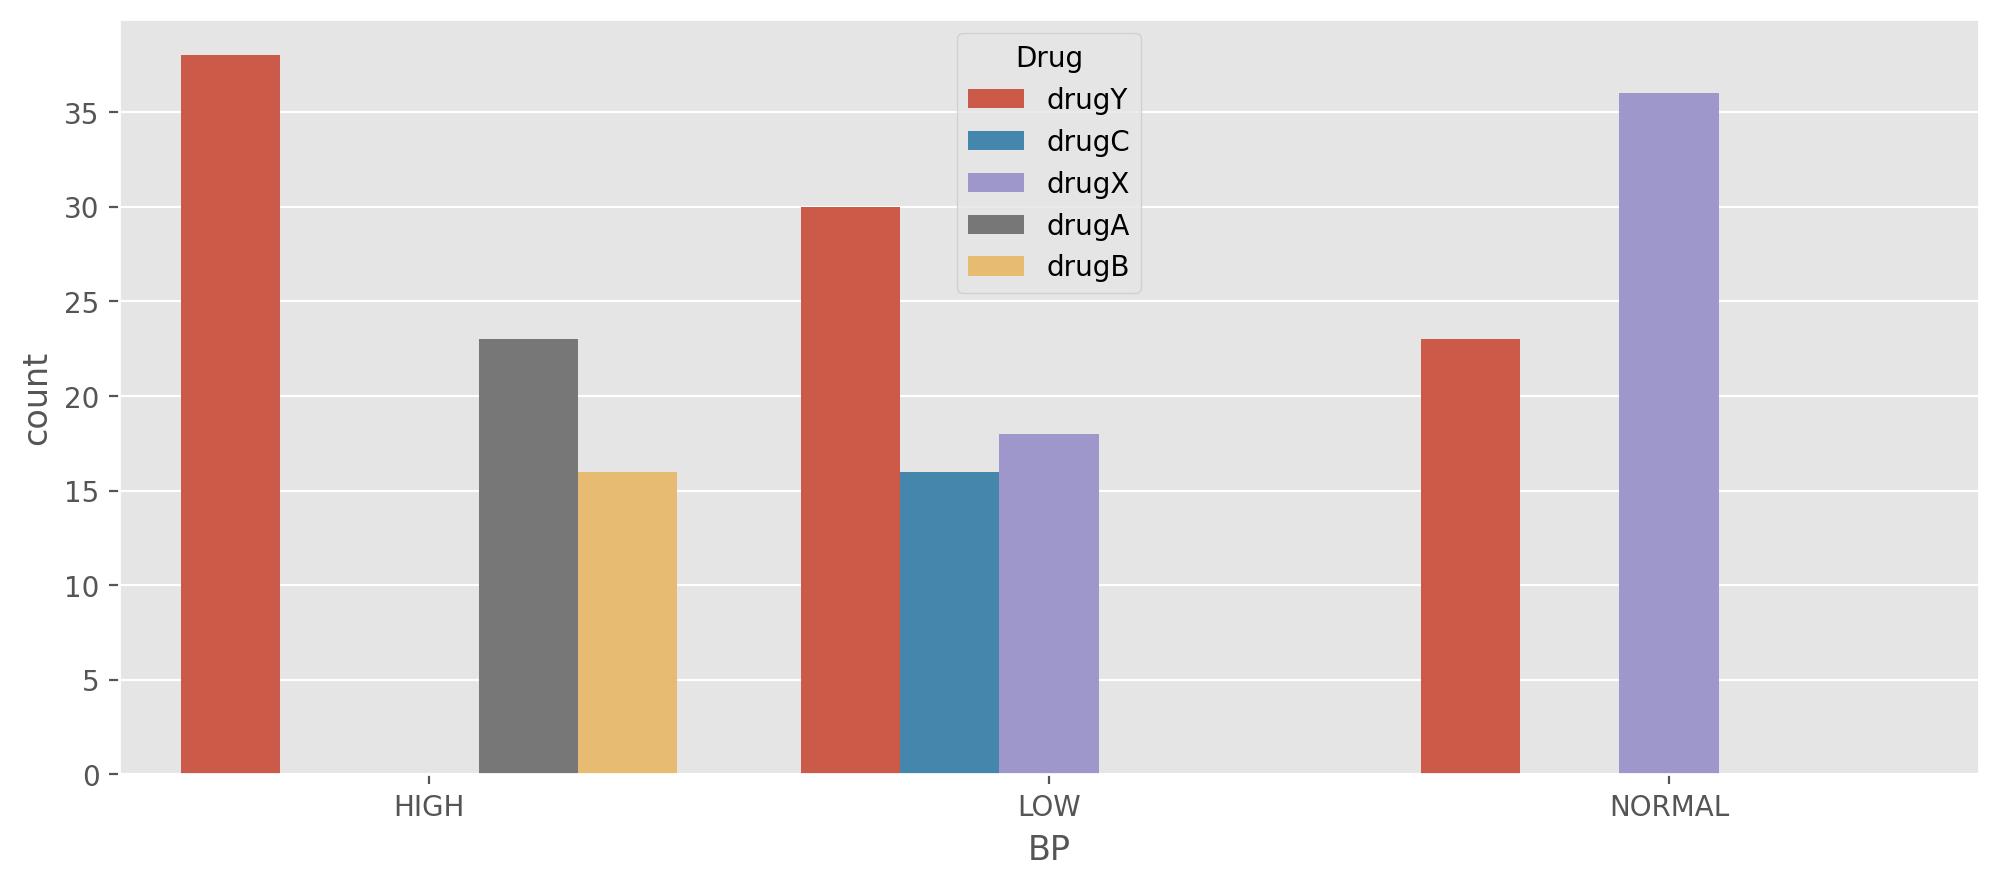

In [13]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.BP, hue = data.Drug)

<AxesSubplot:xlabel='Drug', ylabel='count'>

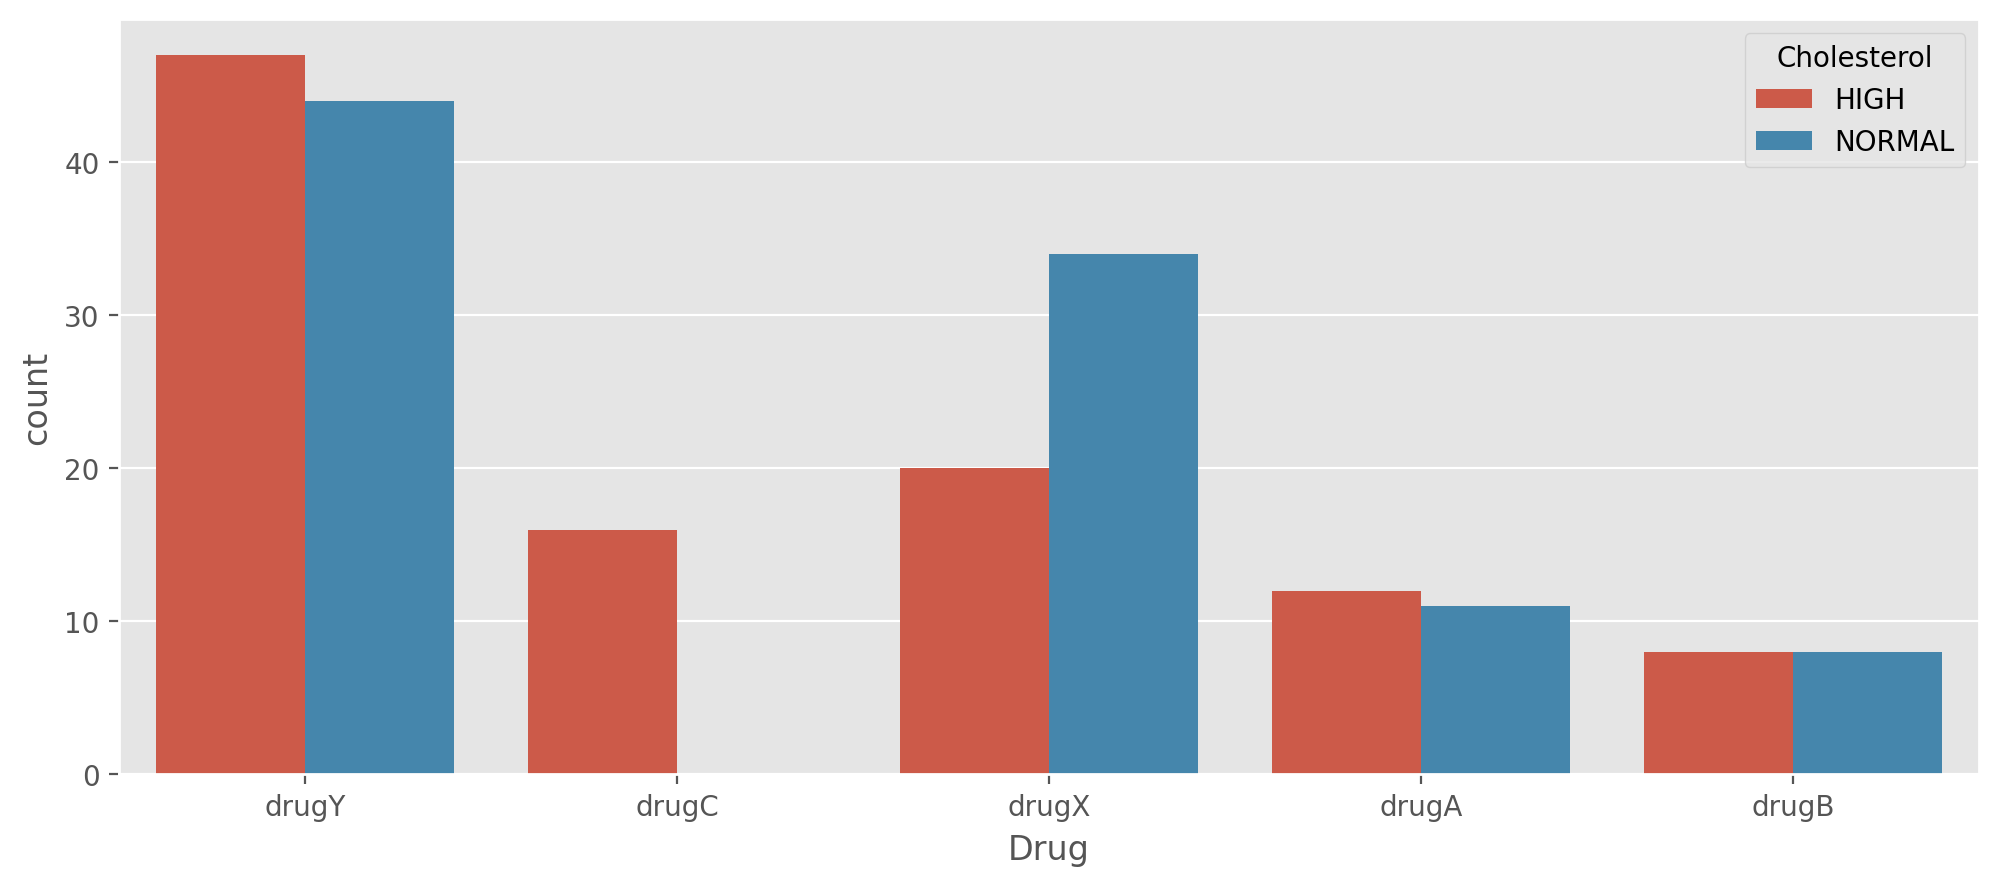

In [14]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug, hue = data.Cholesterol)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

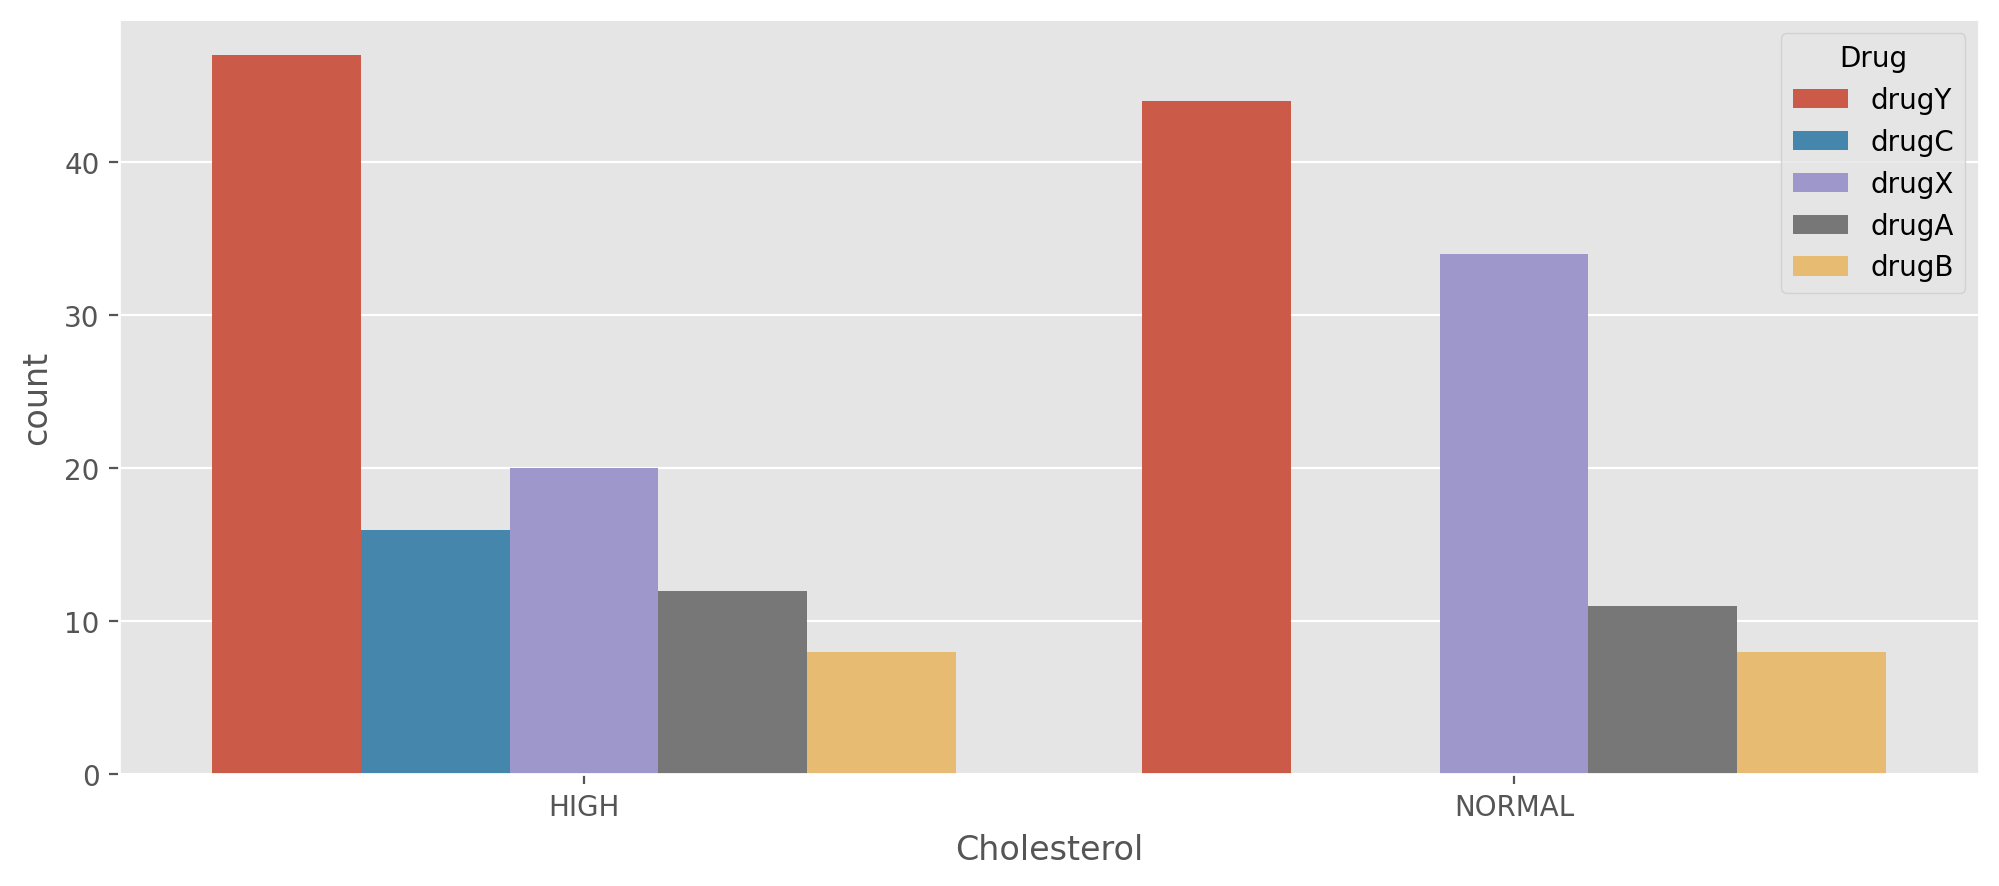

In [15]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Cholesterol, hue = data.Drug)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

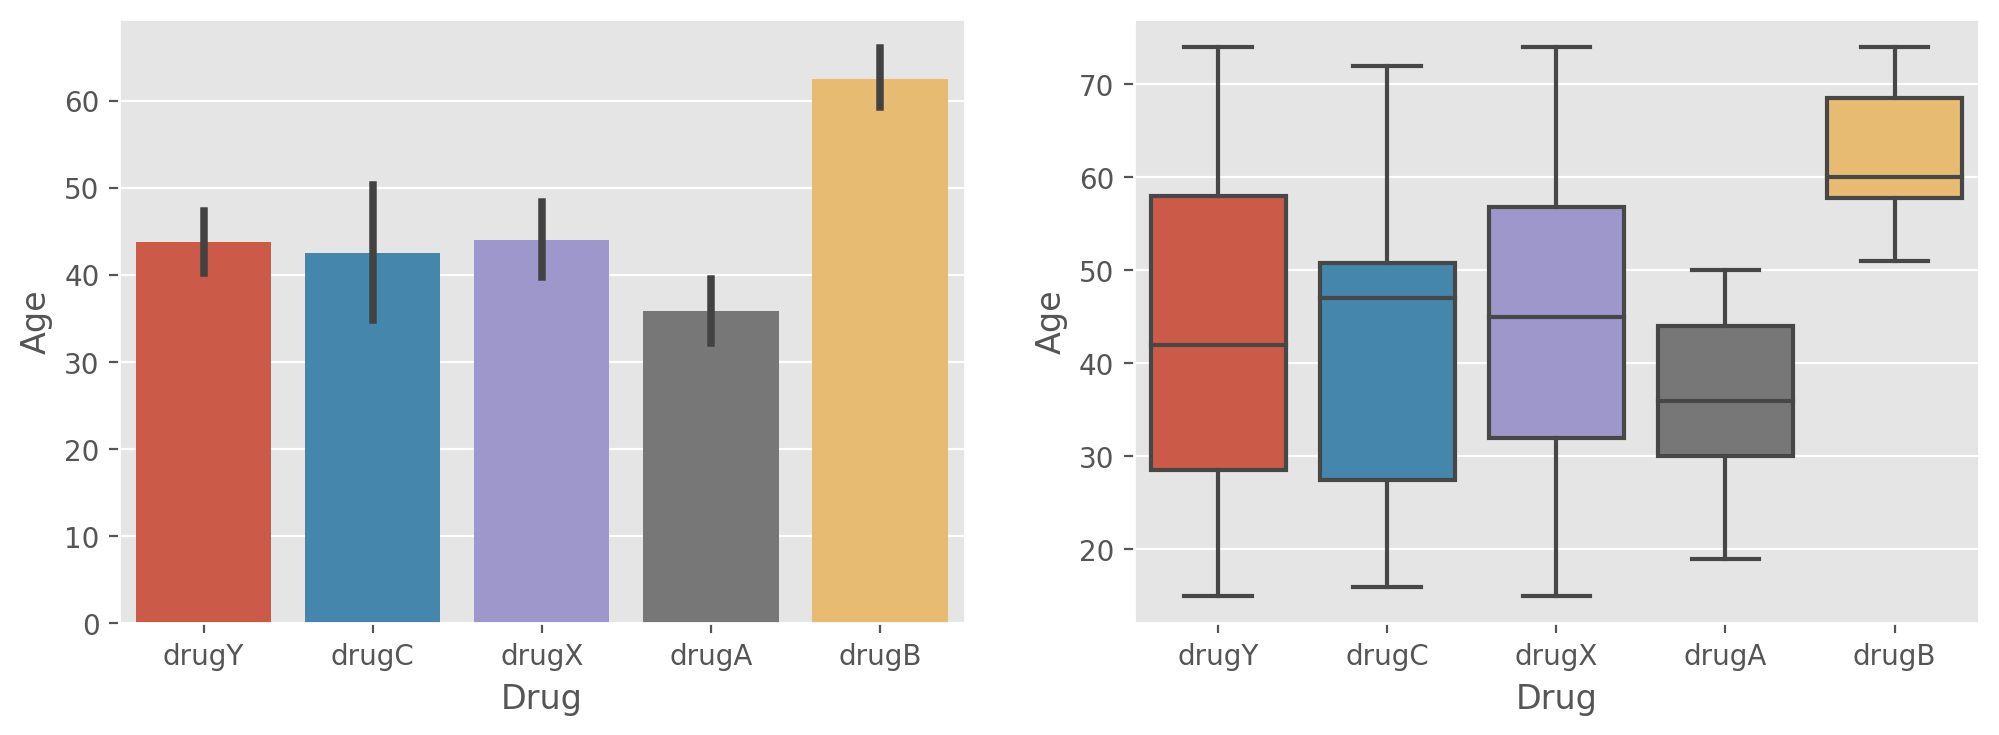

In [16]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(data.Drug, data.Age)
plt.subplot(1,2,2)
sns.boxplot(data.Drug, data.Age)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

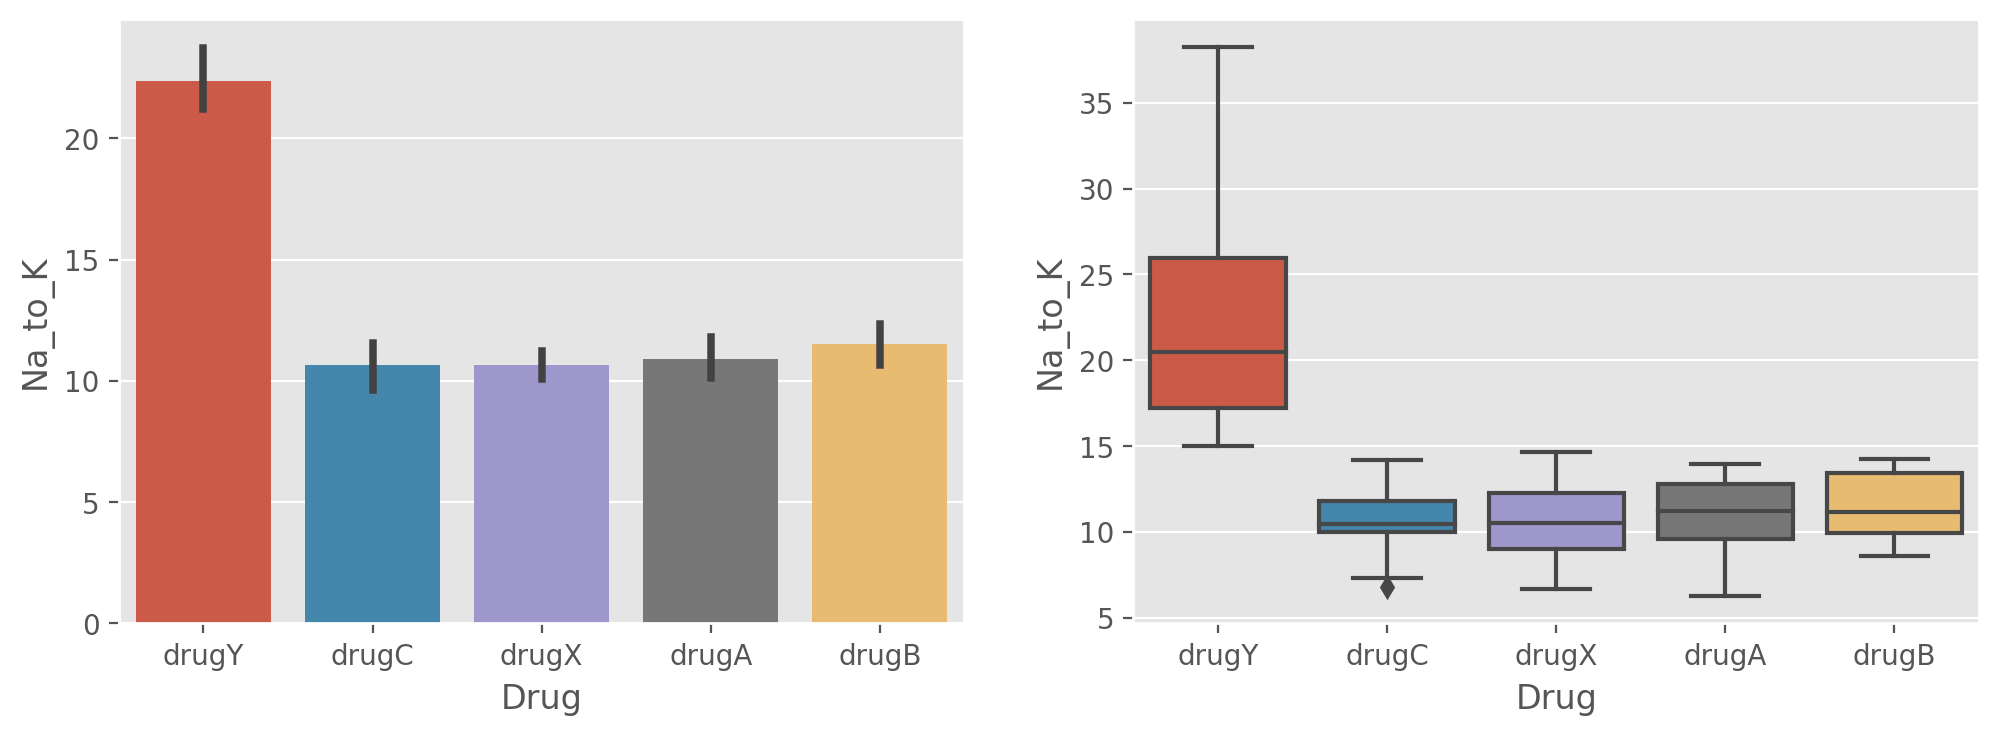

In [17]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(data.Drug, data.Na_to_K)
plt.subplot(1,2,2)
sns.boxplot(data.Drug, data.Na_to_K)

In [18]:
data.BP = data.BP.map({'LOW' : 0, 'NORMAL' : 1, 'HIGH' : 2})
data.Cholesterol = data.Cholesterol.map({'NORMAL' : 0, 'HIGH' : 1})

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,1,25.355,drugY
1,47,M,0,1,13.093,drugC
2,47,M,0,1,10.114,drugC
3,28,F,1,1,7.798,drugX
4,61,F,0,1,18.043,drugY


In [19]:
cols = ['Age', 'Na_to_K', 'BP', 'Cholesterol']
X = data[cols].values
Y = data[['Drug']].values

In [20]:
X[:10]

array([[23.   , 25.355,  2.   ,  1.   ],
       [47.   , 13.093,  0.   ,  1.   ],
       [47.   , 10.114,  0.   ,  1.   ],
       [28.   ,  7.798,  1.   ,  1.   ],
       [61.   , 18.043,  0.   ,  1.   ],
       [22.   ,  8.607,  1.   ,  1.   ],
       [49.   , 16.275,  1.   ,  1.   ],
       [41.   , 11.037,  0.   ,  1.   ],
       [60.   , 15.171,  1.   ,  1.   ],
       [43.   , 19.368,  0.   ,  0.   ]])

In [21]:
Y[:10]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY'],
       ['drugX'],
       ['drugY'],
       ['drugC'],
       ['drugY'],
       ['drugY']], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [23]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (160, 4)
Training Labels Shape :  (160, 1)
Testing Data Shape    :  (40, 4)
Testing Labels Shape  :  (40, 1)


**DecisionTreeClassifier**(
>      class_weight=None, criterion='entropy', max_depth=8
       max_features=None, max_leaf_nodes=None,
       min_impurity_decrease=0.0, min_impurity_split=None,
       min_samples_leaf=1, min_samples_split=2,
       min_weight_fraction_leaf=0.0, presort=False,
       random_state=14, splitter='best')**

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0


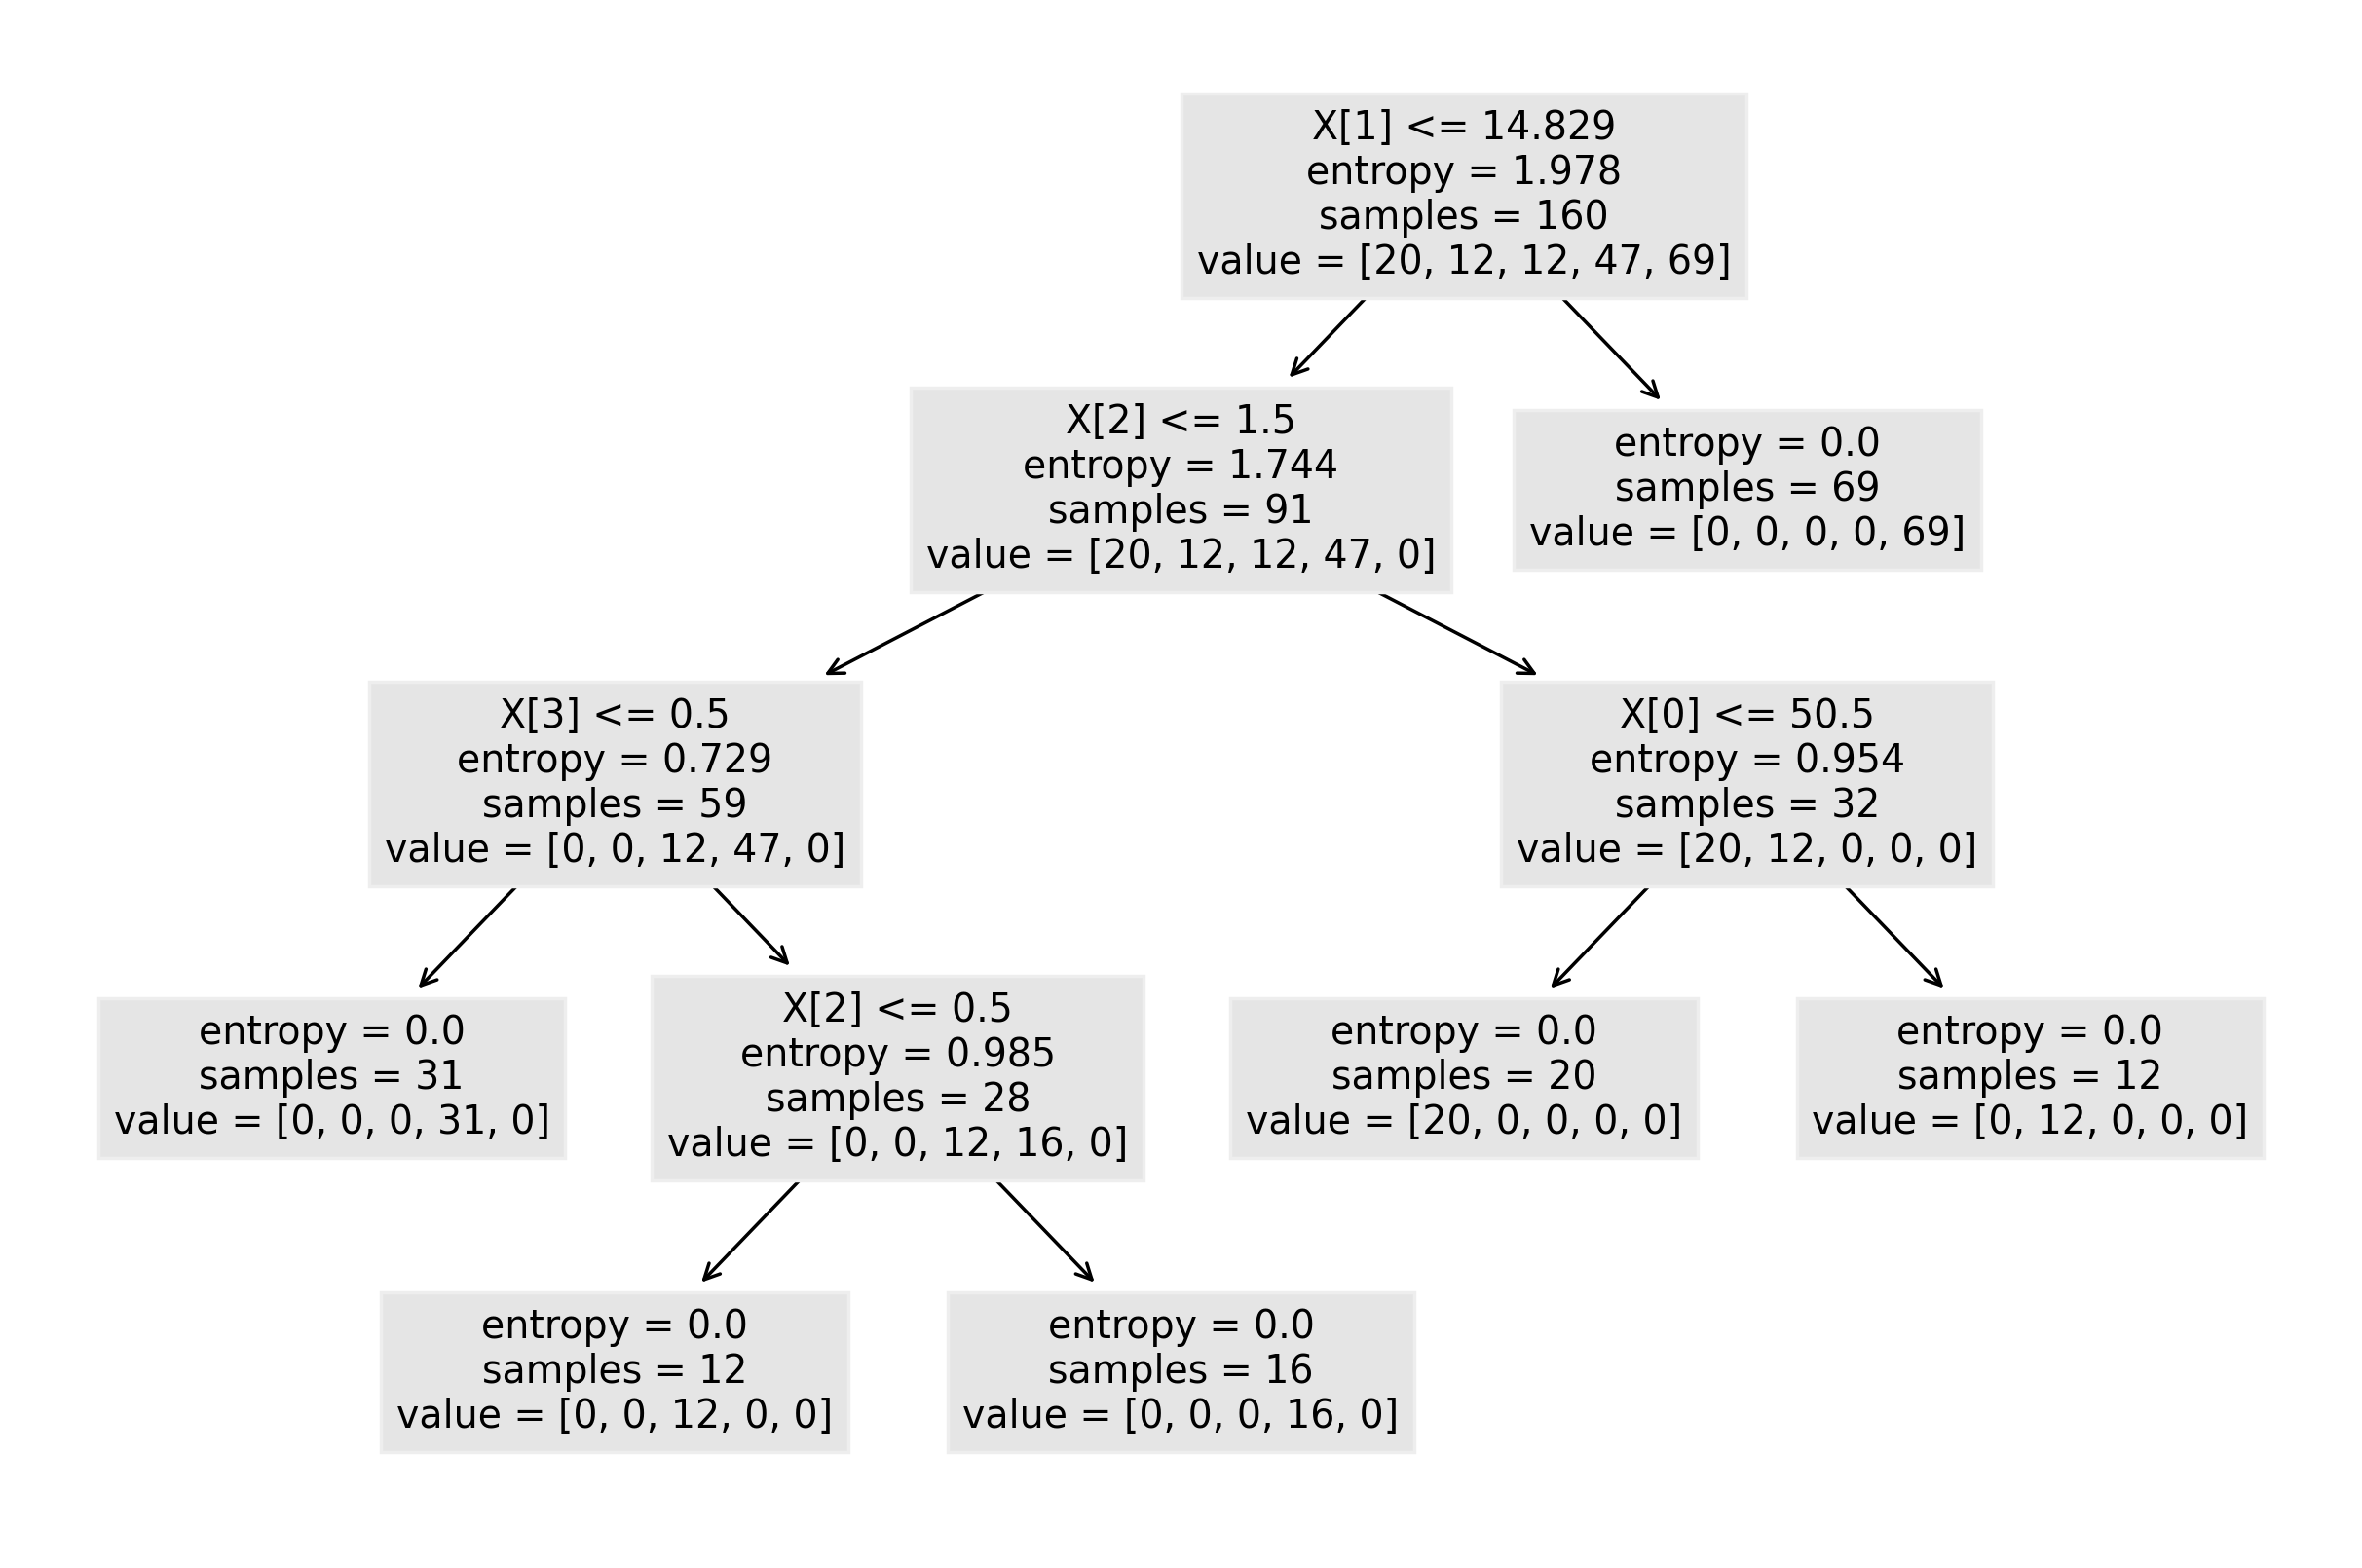

In [31]:
from sklearn.tree import plot_tree
plt.figure(dpi = 500)
plot_tree(classifier)
plt.show()

In [33]:
pd.DataFrame(y_train).value_counts()

drugY    69
drugX    47
drugA    20
drugB    12
drugC    12
dtype: int64